# Data Analysis of Death Penalty - By: Sierra Shaw

## Load Dataset

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/database.csv")

## Overview of Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1442 entries, 0 to 1441
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              1442 non-null   object
 1   Name              1442 non-null   object
 2   Age               1442 non-null   int64 
 3   Sex               1442 non-null   object
 4   Race              1442 non-null   object
 5   Crime             1442 non-null   object
 6   Victim Count      1442 non-null   int64 
 7   Victim Sex        1437 non-null   object
 8   Victim Race       1436 non-null   object
 9   County            1440 non-null   object
 10  State             1442 non-null   object
 11  Region            1442 non-null   object
 12  Method            1442 non-null   object
 13  Juvenile          1442 non-null   object
 14  Volunteer         1442 non-null   object
 15  Federal           1442 non-null   object
 16  Foreign National  1442 non-null   object
dtypes: int64(2), o

In [5]:
df.head(10)

,Date,Name,Age,Sex,Race,Crime,Victim Count,Victim Sex,Victim Race,County,State,Region,Method,Juvenile,Volunteer,Federal,Foreign National
0,01/17/1977,Gary Gilmore,36,Male,White,Murder,1,Male,White,Utah,UT,West,Firing Squad,No,Yes,No,No
1,05/25/1979,John Spenkelink,30,Male,White,Murder,1,Male,White,Leon,FL,South,Electrocution,No,No,No,No
2,10/22/1979,Jesse Bishop,46,Male,White,Murder,1,Male,White,Clark,NV,West,Gas Chamber,No,Yes,No,No
3,03/09/1981,Steven Judy,24,Male,White,Murder,4,"2 Male, 2 Female",White,Marion,IN,Midwest,Electrocution,No,Yes,No,No
4,08/10/1982,Frank Coppola,38,Male,White,Murder,1,Male,White,Newport News City,VA,South,Electrocution,No,Yes,No,No
5,12/07/1982,Charlie Brooks,40,Male,Black,Murder,1,Male,White,Tarrant,TX,South,Lethal Injection,No,No,No,No
6,04/22/1983,John Evans,33,Male,White,Murder,1,Male,White,Mobile,AL,South,Electrocution,No,No,No,No
7,09/02/1983,Jimmy Gray,34,Male,White,Murder,1,Female,White,Jackson,MS,South,Gas Chamber,No,No,No,No
8,11/30/1983,Robert Sullivan,36,Male,White,Murder,1,Male,White,Miami-Dade,FL,South,Electrocution,No,No,No,No
9,12/14/1983,Robert Williams,31,Male,Black,Murder,1,Male,Black,East Baton Rouge Parish,LA,South,Electrocution,No,No,No,No


## Cleaning Data

#### Dropping columns

In [6]:
df.columns

Index(['Date', 'Name', 'Age', 'Sex', 'Race', 'Crime', 'Victim Count',
       'Victim Sex', 'Victim Race', 'County', 'State', 'Region', 'Method',
       'Juvenile', 'Volunteer', 'Federal', 'Foreign National'],
      dtype='object')

In [9]:
df = df[['Date', 'Name', 'Age', 'Sex', 'Race', 'Crime', 'Victim Count',
       'Victim Sex', 'Victim Race', 'State', 'Region', 'Method']]

df.shape

(1442, 12)

Got rid of columns I didn't deem necessary or important to analyze.

In [18]:
# Rename our columns for consistency
df = df.rename(columns={'Victim Count':'Victim_Count',
                   'Victim Sex':'Victim_Sex',
                   'Victim Race': 'Victim_Race'})

Renamed columns with spaces to avoid complications when analyzing data.

In [24]:
df["Victim_Sex"].value_counts()

# Possible Victim Sex

sex_dt = {"Males(s) = Female(s)": ["1 Male, 1 Female", "2 Male, 2 Female", "3 Male, 3 Female"],
            "Male(s) > Female(s)": ["2 Male, 1 Female", "3 Male, 1 Female", "5 Male, 1 Female", "3 Male, 2 Female", "6 Male, 3 Female", "7 Male, 2 Female"],
            "Male(s) < Female(s)": ["1 Male, 2 Female", "1 Male, 3 Female", "1 Male, 4 Female", "2 Male, 3 Female", "6 Male, 10 Female", "1 Male, 5 Female"]}

def organize_sex(word):
    for key in sex_dt:
        if word in sex_dt[key]:
            return key
    return word

df["Victim_Sex"] = df["Victim_Sex"].map(organize_sex)
df["Victim_Sex"].value_counts()

Victim_Sex
Male                    631
Female                  593
Males(s) = Female(s)    129
Male(s) > Female(s)      44
Male(s) < Female(s)      40
Name: count, dtype: int64

Cleaned up the Victim_Sex column by sorting between male, female, or if multiple victims: male = female count, male > female count, male < female count.

In [73]:
df["Victim_Race"].value_counts()

race_dt = {"Multi-Racial Group": ["1 White, 1 Latino", "1 White, 1 Black", "2 White, 1 Black", "1 White, 2 Latino", "1 White, 2 Black", 
                                  "2 White, 1 Asian", "3 White, 1 Black", "4 White, 1 Black, 1 Latino", "1 White, 3 Latino", "4 White, 1 Black",
                                  "2 White, 1 Latino", "2 White, 2 Asian", "1 White, 3 Asian", "4 White, 1 Latino", "2 White, 3 Black", "1 White, 8 Latino",
                                  "2 White, 6 Black"]}

def organize_race(word):
    for key in race_dt:
        if word in race_dt[key]:
            return key
    return word

df["Victim_Race"] = df["Victim_Race"].map(organize_race)
df["Victim_Race"].value_counts()


Victim_Race
White                 1087
Black                  192
Latino                  94
Multi-Racial Group      38
Asian                   22
Native American          3
Name: count, dtype: int64

Same thing for Victim_Race, but after looking at the value_counts, I realized that I thought it would be important to see the difference between all victims being the same race or being of different races.

#### Looking for null data

In [11]:
# Overall sum of null data
df.isna().sum()

# Ratio of null data to number of rows per column
df.isna().sum() / df.shape[0]

Date            0.000000
Name            0.000000
Age             0.000000
Sex             0.000000
Race            0.000000
Crime           0.000000
Victim Count    0.000000
Victim Sex      0.003467
Victim Race     0.004161
State           0.000000
Region          0.000000
Method          0.000000
dtype: float64

Found that there was some null data in victim sex and race, but the percentage of null data is below 10% (in this case, it was less than 0.5% for both), and therefore should not be dropped.

#### Checking for duplicates

In [13]:
df.duplicated().sum()

df.duplicated(["Name"]).sum()

17

Found no immediate duplicates, but found that there were duplicates of the criminal's name.

In [14]:
# Get the rows and sort by criminal name
df.loc[df.duplicated(["Name"], keep=False)].sort_values(["Name"])

,Date,Name,Age,Sex,Race,Crime,Victim Count,Victim Sex,Victim Race,State,Region,Method
900,03/09/2004,David Brown,49,Male,White,Murder,1,Male,White,OK,South,Lethal Injection
588,11/19/1999,David Brown,51,Male,Black,Murder,2,Female,White,NC,South,Lethal Injection
709,04/26/2001,David Dawson,46,Male,White,Murder,1,Female,White,DE,South,Lethal Injection
1038,08/11/2006,David Dawson,49,Male,White,Murder,3,"2 Male, 1 Female",White,MT,West,Lethal Injection
902,03/19/2004,David Hill,39,Male,White,Murder,1,Male,White,SC,South,Lethal Injection
1103,06/06/2008,David Hill,48,Male,White,Murder,3,"1 Male, 2 Female","2 White, 1 Black",SC,South,Lethal Injection
975,07/28/2005,David Martinez,29,Male,Latino,Murder,1,Female,White,TX,South,Lethal Injection
1143,02/04/2009,David Martinez,36,Male,Latino,Murder,2,"1 Male, 1 Female",Latino,TX,South,Lethal Injection
1063,02/27/2007,Donald Miller,44,Male,White,Murder,2,Male,White,TX,South,Lethal Injection
670,11/08/2000,Donald Miller,36,Male,White,Murder,1,Female,White,AZ,West,Lethal Injection


Found some people who could be the same person - decided that they were the same person if sex, race, and state were the same. Also, checked to see if year difference of dates and age difference are the same. From looking at the data under these requirements, I could not confidently argue that any of the people on this list are repeated.

## Analyzing Data (Exploratory)

In [25]:
df.columns

Index(['Date', 'Name', 'Age', 'Sex', 'Race', 'Crime', 'Victim_Count',
       'Victim_Sex', 'Victim_Race', 'State', 'Region', 'Method'],
      dtype='object')

### Age of Offender

,Date,Name,Age,Sex,Race,Crime,Victim_Count,Victim_Sex,Victim_Race,State,Region,Method
378,05/08/1997,Scott Carpenter,22,Male,Native American,Murder,1,Male,White,OK,South,Lethal Injection


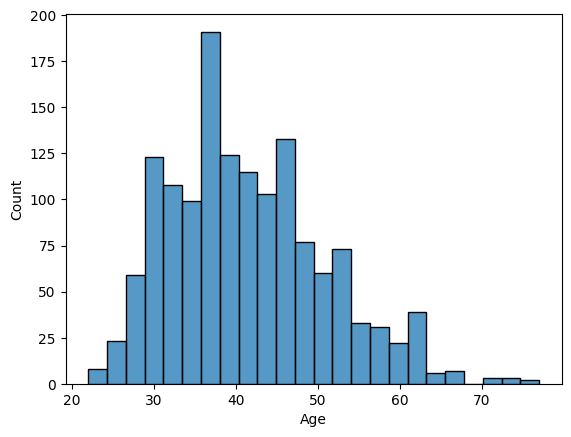

In [36]:
# Looking at the range of ages
sns.histplot(data=df, x="Age")

# Youngest and Oldest to Undergo the Death Penalty
df.loc[df["Age"] == df["Age"].min()]
df.loc[df["Age"] == df["Age"].max()]


Oldest offender age 77, youngest offender age 22.

### Race of Offender

<Axes: xlabel='Race', ylabel='Count'>

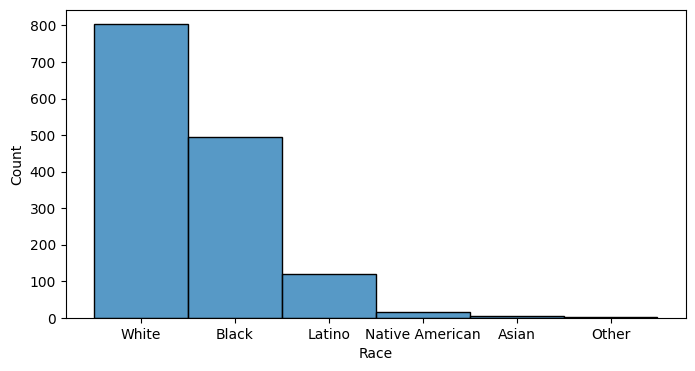

In [80]:
plt.figure(figsize=(8,4))
sns.histplot(data=df, x="Race")

### Sex of Offender

In [54]:
df.loc[df["Sex"] == "Female"] #16 women

# Percentage of Women Offenders
16 / df.shape[0] * 100

1.1095700416088765

Women take up around 1.1% of the offenders that received the death penalty.

### Crime Committed

In [56]:
# Only crime was murder
df["Crime"].value_counts()

Crime
Murder    1442
Name: count, dtype: int64

### Victim Count

,Date,Name,Age,Sex,Race,Crime,Victim_Count,Victim_Sex,Victim_Race,State,Region,Method
716,06/11/2001,Timothy McVeigh*,33,Male,White,Murder,168,NaN,NaN,FE,South,Lethal Injection


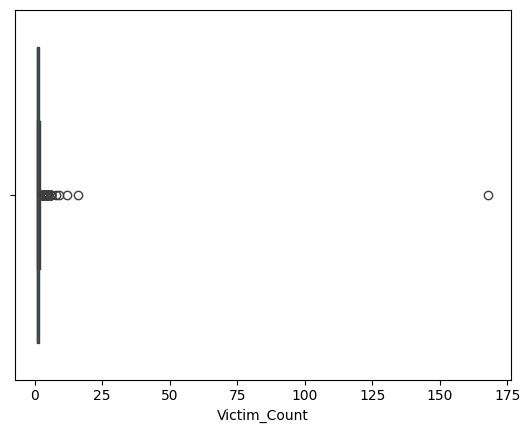

In [61]:
sns.boxplot(data=df, x="Victim_Count")

# Finding the murderer with outlier victim count --> Timothy McVeigh - American domestic terrorist, Oklahoma Bombing
df.loc[df["Victim_Count"] == df["Victim_Count"].max()]

<Axes: xlabel='Victim_Count'>

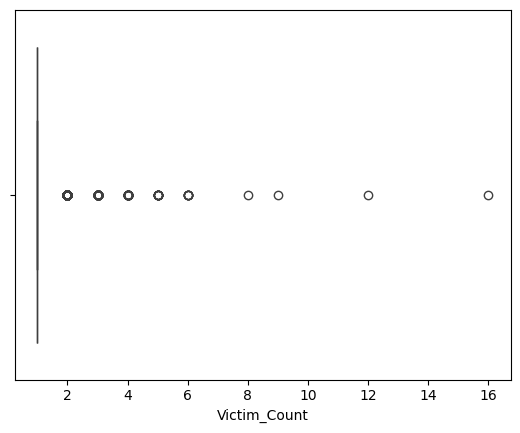

In [88]:
df = df.drop(df.loc[df["Name"] == "Timothy McVeigh*"].index)

Removing Timothy from the dataset so I can better analyze the victim count.

### Method

In [63]:
df["Method"].value_counts()

Method
Lethal Injection    1267
Electrocution        158
Gas Chamber           11
Firing Squad           3
Hanging                3
Name: count, dtype: int64

### State

In [69]:
# Texas has the most by a mile, CA has 13
df["State"].value_counts()

State
TX    538
OK    112
VA    111
FL     92
MO     87
GA     69
AL     58
OH     53
NC     43
SC     43
AZ     37
LA     28
AR     27
MS     21
IN     20
DE     16
CA     13
IL     12
NV     12
UT      7
TN      6
WA      5
MD      5
ID      3
NE      3
PA      3
MT      3
KY      3
FE      3
SD      3
OR      2
CO      1
WY      1
NM      1
CT      1
Name: count, dtype: int64

### Victim Race

<Axes: xlabel='Victim_Race', ylabel='Count'>

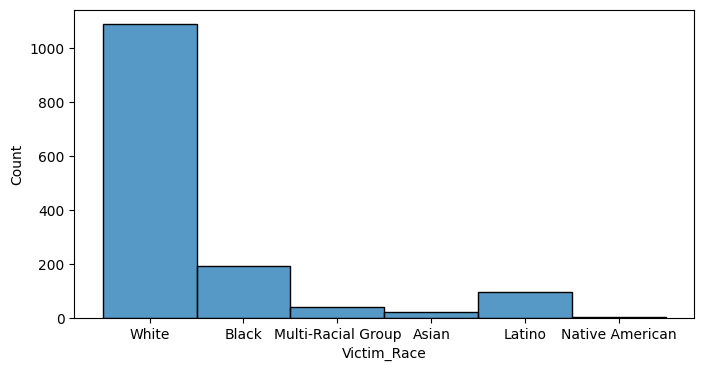

In [81]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x="Victim_Race")

## Statistical Analysis

#### How does the race of the offender affect the race of their victim?

<Axes: title={'center': 'Offender Race vs Victim Race'}, xlabel='Race', ylabel='Victim_Race'>

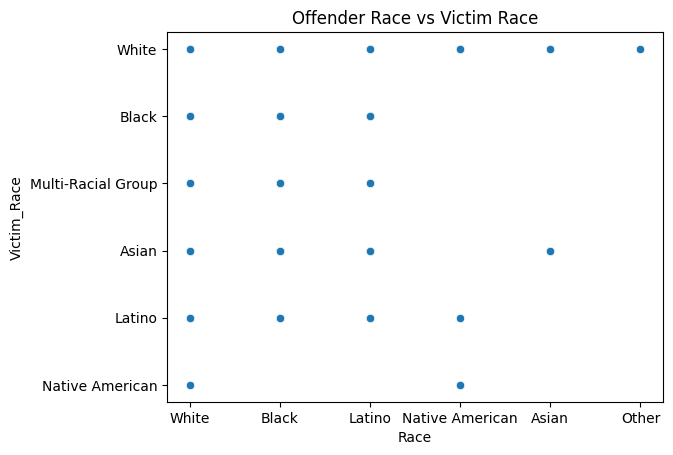

In [82]:
plt.title("Offender Race vs Victim Race")

sns.scatterplot(data=df, x="Race", y="Victim_Race")

White people were killed by all races of offenders. White offenders killed the most variety of races.

#### How does someone's age affect their number of victims?

<Axes: title={'center': 'Offender Age vs Victim Count'}, xlabel='Age', ylabel='Victim_Count'>

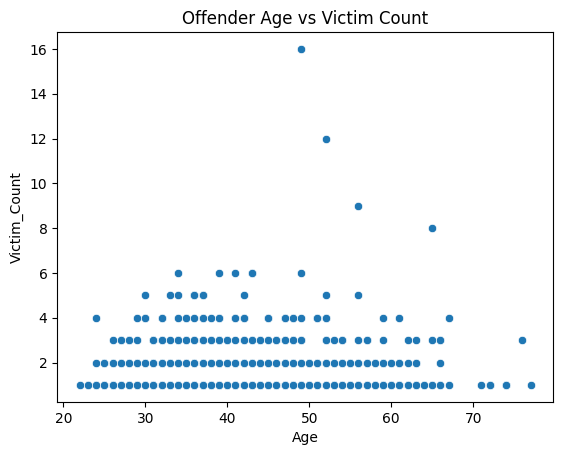

In [89]:
plt.title("Offender Age vs Victim Count")

sns.scatterplot(data=df, x="Age", y="Victim_Count")

Took out Timothy so the data could be better analyzed. It seems like there isn't a huge correlation between age and victim count, but in the higher victim count cases, they seem to be only present at older ages.